In [28]:
from tensorflow import keras
import config
from PIL import Image 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [2]:
print(config.train_dir)

Fire-vs-NoFire\Training


In [3]:
train_dir =  config.train_dir


    # 0 is Fire and 1 is NO_Fire
fire_imgs = [fn for fn in os.listdir(f'{train_dir}/Fire') if fn.endswith('.jpg')]
no_fire_imgs = [fn for fn in os.listdir(f'{train_dir}/No_fire') if fn.endswith('.jpg')]

In [4]:
len(fire_imgs), len(no_fire_imgs)

(25018, 14357)

In [10]:
list_category = []
list_size =[]
list_mode = []
list_format = []
list_name = []

for fire_img in fire_imgs:
    list_name.append(fire_img)
    list_category.append('Fire')
    src = os.path.join(train_dir, 'Fire\\'+fire_img)
    #print(src)
    image = Image.open(src) 
    list_mode.append(image.mode)
    list_size.append(image.size)
    list_format.append(image.format)
    




In [11]:
for no_fire_img in no_fire_imgs:
    list_name.append(no_fire_img)
    list_category.append('No_Fire')
    src = os.path.join(train_dir, 'No_Fire\\'+no_fire_img)
    #print(src)
    image = Image.open(src) 
    list_mode.append(image.mode)
    list_size.append(image.size)
    list_format.append(image.format)

In [18]:
df = pd.DataFrame({'image_name':list_name,'image_size':list_size,'image_mode':list_mode,'image_format':list_format,'category':list_category})

In [19]:
df

,image_name,image_size,image_mode,image_format,category
0,resized_frame0.jpg,"(254, 254)",RGB,JPEG,Fire
1,resized_frame1.jpg,"(254, 254)",RGB,JPEG,Fire
2,resized_frame10.jpg,"(254, 254)",RGB,JPEG,Fire
3,resized_frame100.jpg,"(254, 254)",RGB,JPEG,Fire
4,resized_frame1000.jpg,"(254, 254)",RGB,JPEG,Fire
...,...,...,...,...,...
39370,resized_frame6876.jpg,"(254, 254)",RGB,JPEG,No_Fire
39371,resized_frame6877.jpg,"(254, 254)",RGB,JPEG,No_Fire
39372,resized_frame6878.jpg,"(254, 254)",RGB,JPEG,No_Fire
39373,resized_frame6879.jpg,"(254, 254)",RGB,JPEG,No_Fire


In [21]:
df['category'].value_counts()

Fire       25018
No_Fire    14357
Name: category, dtype: int64

In [20]:
df['image_size'].value_counts()

(254, 254)    39375
Name: image_size, dtype: int64

In [22]:
df['image_mode'].value_counts()

RGB    39375
Name: image_mode, dtype: int64

In [23]:
df['image_format'].value_counts()

JPEG    39375
Name: image_format, dtype: int64

Fire       25018
No_Fire    14357
Name: category, dtype: int64

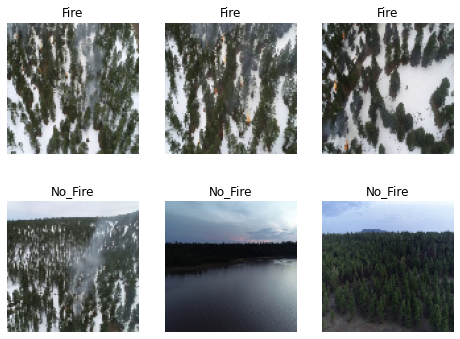

In [31]:
select_fire = np.random.choice(fire_imgs, 3, replace = False)
select_no_fire = np.random.choice(no_fire_imgs, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/Fire/{select_fire[i]}'
        label = 'Fire'
    else:
        fp = f'{train_dir}/No_Fire/{select_no_fire[i-3]}'
        label = 'No_Fire'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100))
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

# also check the number of files here
#len(normal_imgs), len(pneumo_imgs)